# Datacamp boat data notebook
<header><h1>Customer Question</h1></header>
<p>
Is it the most expensive boats that get the most views?<br>
Are there common features among the most viewed boats?<br>
</p>

In [158]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#load in dataset
boat_data = "G:\Datacamp\data.csv"
df = pd.read_csv(boat_data)
df.head(10)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland,132
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland,474
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark,134
8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany,45
9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy,180


In [159]:
#separate price and curr into columns
df['Price'] = df['Price'].astype('string')
df[['Curr', 'Price']] = df['Price'].str.split(' ', 1, expand=True)
df[['Curr', 'Price']]
#convert columns from objects type
df['Price'] = df['Price'].astype('int64')
df['Curr'] = df['Curr'].astype('string')

In [160]:
df.rename(columns={'Number of views last 7 days':'Views', 'Manufacturer':'Maker'}, inplace=True)
df.columns

Index(['Price', 'Boat Type', 'Maker', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Location', 'Views', 'Curr'],
      dtype='object')

In [161]:
nadf = df.isna()
nadf.sum()

Price            0
Boat Type        0
Maker         1338
Type             6
Year Built       0
Length           9
Width           56
Material      1749
Location        36
Views            0
Curr             0
dtype: int64

##### Newer boats get more views with spikes in the late 2000s. 2020 most popular year. 

<AxesSubplot:xlabel='Year Built'>

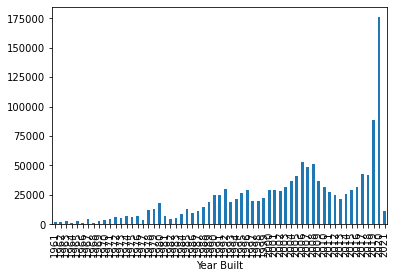

In [162]:

popbyyear = df[['Year Built','Views']]
popbyyear = popbyyear[popbyyear['Year Built']>1960]
popbyyear = popbyyear.groupby('Year Built')['Views'].sum()
popbyyear.plot(kind='bar')

#### Is it the most expensive boats that get the most views?

In [163]:
#convert currency to euros
df.Curr.value_counts()


EUR    8430
CHF     980
Â£      298
DKK     180
Name: Curr, dtype: Int64

In [164]:
#convert currency, price to euros
eurcurr = df['Curr'] == 'EUR'
chfcurr = df['Curr'] == 'CHF'
britcurr = df['Curr'] == 'Â£'
dkkcurr = df['Curr'] == 'DKK'

chf = 1.03
brit = 1.18
dkk = 0.13

df.loc[chfcurr, 'Price'] = df.loc[chfcurr, 'Price'] * chf
df.loc[chfcurr, 'Curr'] = 'EUR'

df.loc[britcurr, 'Price'] = df.loc[britcurr, 'Price'] * brit
df.loc[britcurr, 'Curr'] = 'EUR'

df.loc[dkkcurr, 'Price'] = df.loc[dkkcurr, 'Price'] * dkk
df.loc[dkkcurr, 'Curr'] = 'EUR'

#Conversion rounded to int
df['Price'] = df['Price'].round()
df['Price'] = df['Price'].astype('int64')
df[['Price', 'Curr']]

,Price,Curr
0,3437,EUR
1,3490,EUR
2,3883,EUR
3,3367,EUR
4,3399,EUR
...,...,...
9883,5047,EUR
9884,4516,EUR
9885,4499,EUR
9886,4300,EUR


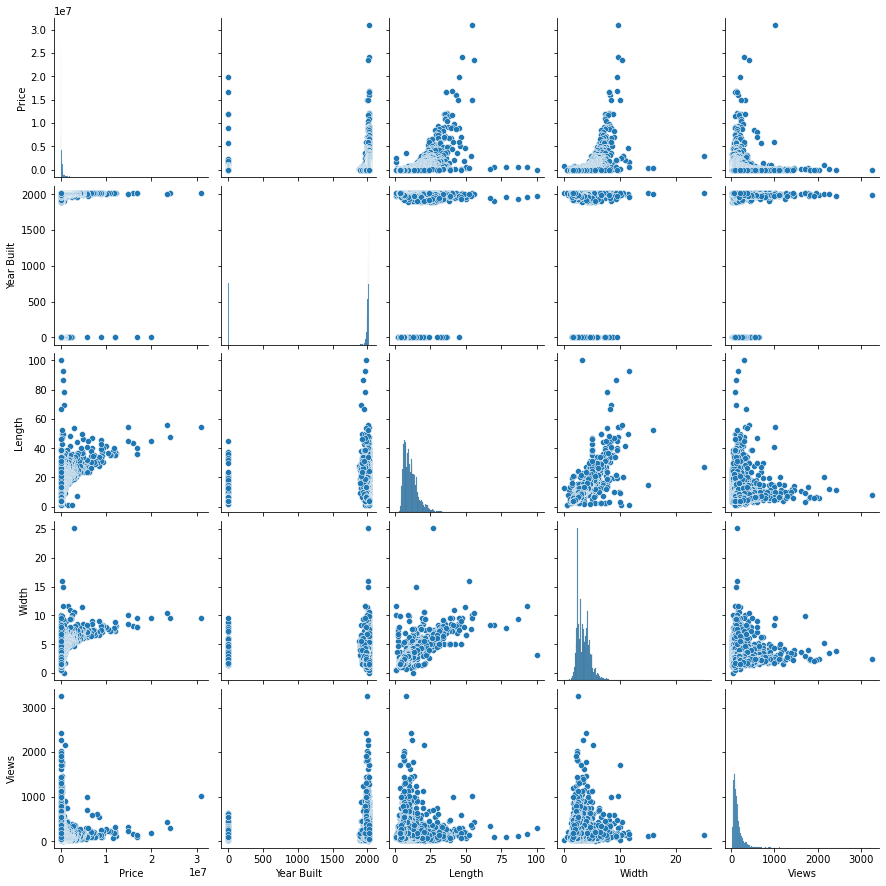

In [165]:
import seaborn as sns

sns.pairplot(data=df)


<AxesSubplot:>

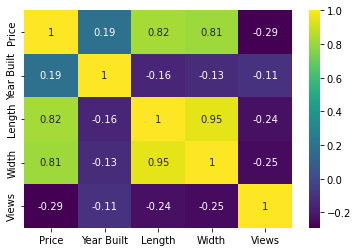

In [166]:
sns.heatmap(data = df.corr(method='spearman'), annot=True, cmap='viridis', robust=True)

<AxesSubplot:>

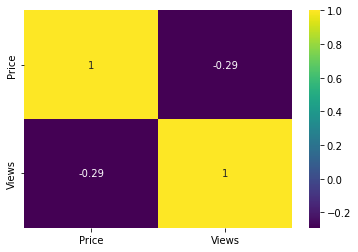

In [167]:
price_views = df[['Price', 'Views']]
sns.heatmap(data = price_views.corr(method='spearman'), annot=True, cmap='viridis', robust=True)

<AxesSubplot:>

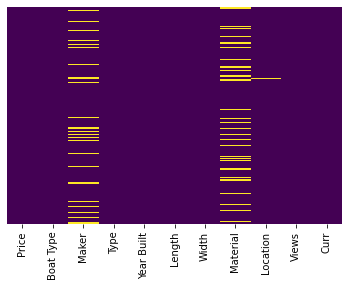

In [168]:
df['Price'].replace(0, np.nan, inplace=True)
sns.heatmap(data=df.isna(), yticklabels=False,cbar=False,cmap='viridis')

##### No correlation between boat price and views \n Weak correlation between Build year and views

In [169]:
df['Area'] = df['Width'] * df['Length']
df['Area']


0        7.6000
1        6.0000
2        5.2398
3        3.0000
4        5.1830
         ...   
9883    15.3720
9884     7.0056
9885     7.9200
9886     8.2593
9887     5.7600
Name: Area, Length: 9888, dtype: float64

c:\Users\ellis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

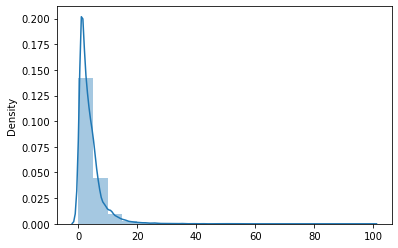

In [170]:
area_bucket = pd.cut(df['Area'], 100, labels=False)

sns.distplot(x=area_bucket, bins=20)

In [171]:
drpna = df.dropna(how='any')
drpna.size

84228

##### 'Price', 'Boat Type', 'Maker', 'Type', 'Year Built', 'Length', 'Width','Material', 'Location', 'Views', 'Curr'

<AxesSubplot:>

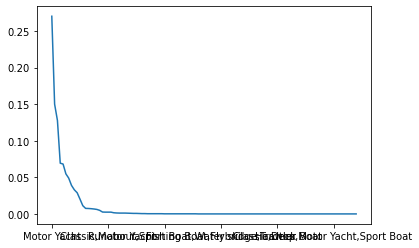

In [172]:
drpna['Boat Type'].value_counts(normalize=True).plot()

<AxesSubplot:>

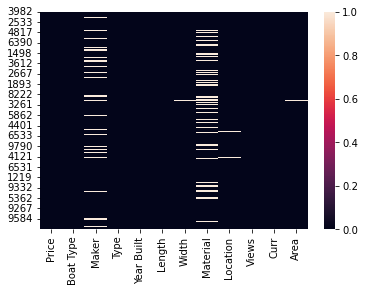

In [173]:
df_clean = df.drop_duplicates().sort_values('Views')
df_clean = df_clean
sns.heatmap(df_clean.isna())

In [176]:
df_clean.dtypes

Price           int64
Boat Type      object
Maker          object
Type           object
Year Built      int64
Length        float64
Width         float64
Material       object
Location       object
Views           int64
Curr           string
Area          float64
dtype: object

In [177]:
df_clean[['Boat Type', 'Maker', 'Type', 'Material', 'Location']] = df_clean[['Boat Type', 'Maker', 'Type', 'Material', 'Location']].astype('string')

c:\Users\ellis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\ellis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -0.20997465690298553


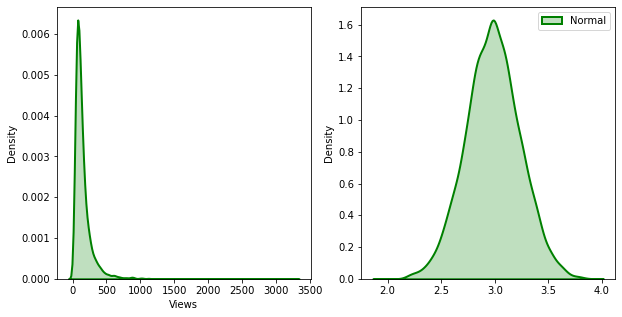

In [183]:
from scipy import stats

fitted_data, fitted_lambda = stats.boxcox(df_clean['Views'])

fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(df_clean['Views'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

c:\Users\ellis\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<AxesSubplot:xlabel='Views', ylabel='Count'>

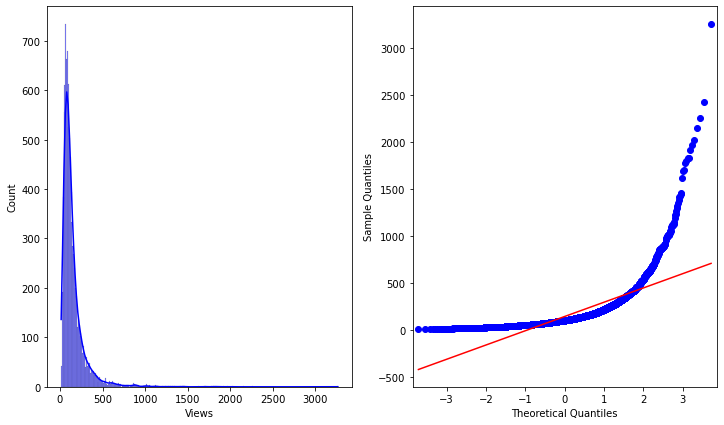

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm



fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sm.ProbPlot(df_clean['Views']).qqplot(line='s', ax=ax[1]);
sns.histplot(df_clean['Views'],kde=True, color ='blue',ax=ax[0])

c:\Users\ellis\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


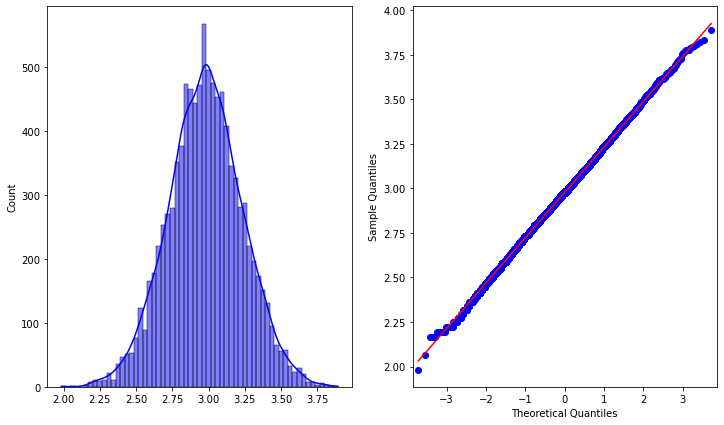

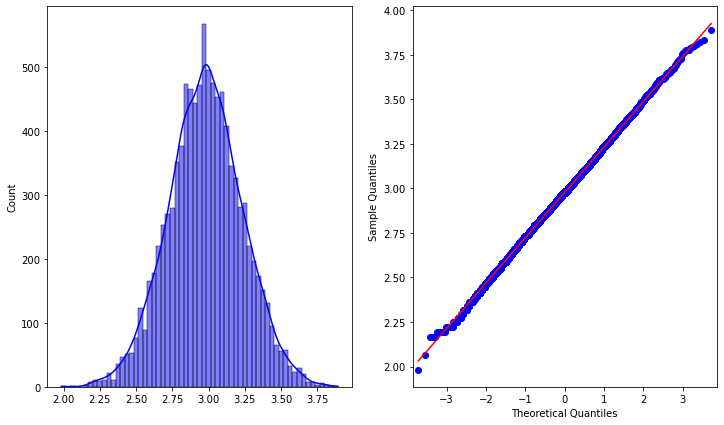

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(fitted_data,kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(fitted_data).qqplot(line='s', ax=ax[1])

In [189]:
views_q3 = np.percentile(fitted_data, 75,
                   interpolation = 'midpoint')
views_q1 = np.percentile(fitted_data, 25,
                   interpolation = 'midpoint')
iqr = views_q3 - views_q1
upper = views_q3 +iqr*1.5
lower = views_q1 -iqr*1.5
views_upper = fitted_data >=upper
views_lower = fitted_data <=lower
fitted_data.delete(upper)
fitted_data.delete(lower)
df.shape, df_clean.shape

AttributeError: 'numpy.ndarray' object has no attribute 'delete'